<a href="https://colab.research.google.com/github/Mahesh-Vardhan/ml-codes/blob/main/Object_Detection_Using_Yolov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
! pip install ultralytics

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [90]:
yolo = cv2.dnn.readNet( "./yolov3-tiny.weights", "./yolov3-tiny-cfg.cfg")

In [91]:
classes = []
with open("./coco-names.names", "r") as f:
  classes = f.read().splitlines()

In [92]:
image = cv2.imread("./aa.jpeg")
blob = cv2.dnn.blobFromImage(image, 1/255, (320, 320), (0, 0, 0), swapRB=True, crop = False)

In [93]:
width = image.shape[0]
height = image.shape[1]

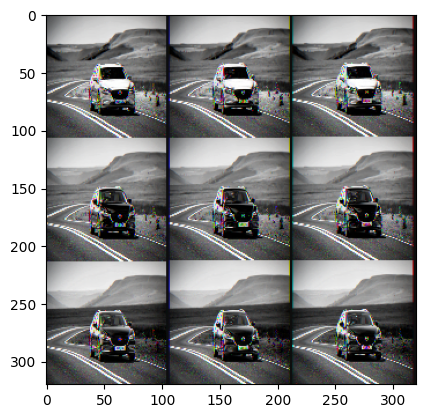

In [94]:
i = blob[0].reshape(320, 320, 3)
plt.imshow(i)

In [95]:
yolo.setInput(blob)

In [96]:
output_layers = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers)

In [97]:
bounding_boxes = []
classes = []
confidences = []
for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence >= 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      bounding_boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      classes.append(class_id)

In [98]:
len(bounding_boxes)

1

In [99]:
indexes = cv2.dnn.NMSBoxes(bounding_boxes, confidences, 0.5, 0.4)


In [100]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(bounding_boxes), 3))

In [104]:
for i in indexes.flatten():
  x, y, w, h = bounding_boxes[i]
  label = str(classes[class_id])
  confi = str(round(confidences[i], 2))
  color = colors[i]

  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 5)
  cv2.putText(image, label + " " + confi, (x, y + 20), font, 2, (255, 255, 255), 2)



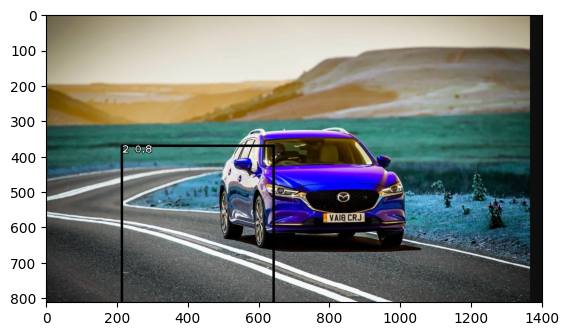

In [105]:
plt.imshow(image)